Gender: F, Age Group: 18-24
                                      Title  Rating
472920                   Beetlejuice (1988)       5
344933                        Splash (1984)       5
357257                  Philadelphia (1993)       5
357262                  Philadelphia (1993)       5
357338                  Philadelphia (1993)       5
357377                  Philadelphia (1993)       5
357509                  Philadelphia (1993)       5
357609                  Philadelphia (1993)       5
357896  Batman: Mask of the Phantasm (1993)       5
357960  Batman: Mask of the Phantasm (1993)       5


Gender: F, Age Group: 25-34
                                         Title  Rating
7       One Flew Over the Cuckoo's Nest (1975)       5
340563            Sense and Sensibility (1995)       5
183917                  Full Monty, The (1997)       5
340580            Sense and Sensibility (1995)       5
183905                  Full Monty, The (1997)       5
516913               African Queen, The 

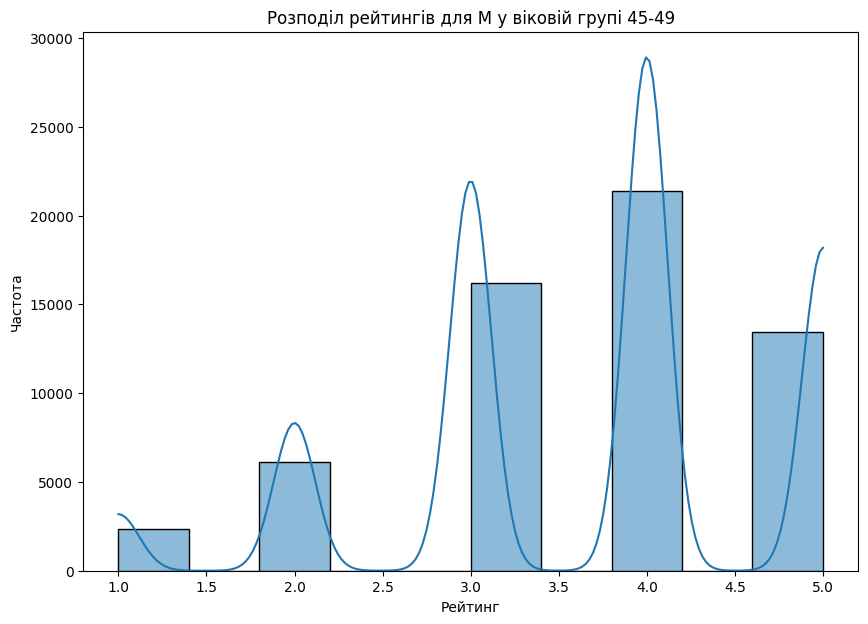

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

movies = pd.read_table('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='latin1')
ratings = pd.read_table('ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin1')
users = pd.read_table('users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='latin1')

merged_data = ratings.merge(users, on='UserID', how='inner') 
data_frame = merged_data.merge(movies, on='MovieID', how='inner') 

def categorize_age(age):
    if age < 18:
        return "до 18 лет"
    elif age <= 24:
        return "18-24"
    elif age <= 34:
        return "25-34"
    elif age <= 44:
        return "35-44"
    elif age <= 49:
        return "45-49"
    elif age <= 55:
        return "50-55"
    else:
        return "56+"

data_frame['Age_Group'] = data_frame['Age'].apply(categorize_age)

grouped_data = data_frame.groupby(['Gender', 'Age_Group'])

top_movies_by_gender_age = {}

for group, frame in grouped_data:
    gender, age_group = group
    top_movies = frame.sort_values(by='Rating', ascending=False).head(10)[['Title', 'Rating']]
    if not top_movies.empty:
        top_movies_by_gender_age[group] = top_movies
    else:
        print(f"No movies available for Gender: {gender}, Age Group: {age_group}")

for group, top_movies in top_movies_by_gender_age.items():
    gender, age_group = group
    print(f"Gender: {gender}, Age Group: {age_group}")
    print(top_movies)
    print("\n")

selected_group = ('M', '45-49')
selected_data = grouped_data.get_group(selected_group)[['Title', 'Rating']]

plt.figure(figsize=(10, 7))
sns.histplot(selected_data['Rating'], bins=10, kde=True)
plt.title(f'Розподіл рейтингів для {selected_group[0]} у віковій групі {selected_group[1]}')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()